
Simulate the **<h2>Exercise 1:Simulation of FMCW Radar**</h2><br>response of an FMCW radar with the following parameters:<br>
 &nbsp;&nbsp;&nbsp;&nbsp;•carrier frequency $𝑓_o$=1GHz<br>
 &nbsp;&nbsp;&nbsp;&nbsp;•bandwidth 𝐵=100MHz<br>
 &nbsp;&nbsp;&nbsp;&nbsp;•sweep time 𝑇=20μs<br>
Assume the following scenario with 3 scatterers:<br>
&nbsp;&nbsp;&nbsp;&nbsp;•scatterer 1 with amplitude 𝑎1=2.0 at range 𝑟1=75m<br>
&nbsp;&nbsp;&nbsp;&nbsp;•scatterer 2 with amplitude 𝑎2=1.0 at range 𝑟2=100m<br>
&nbsp;&nbsp;&nbsp;&nbsp;•scatterer 3 with amplitude 𝑎3=0.5 at range 𝑟3=125m<br>

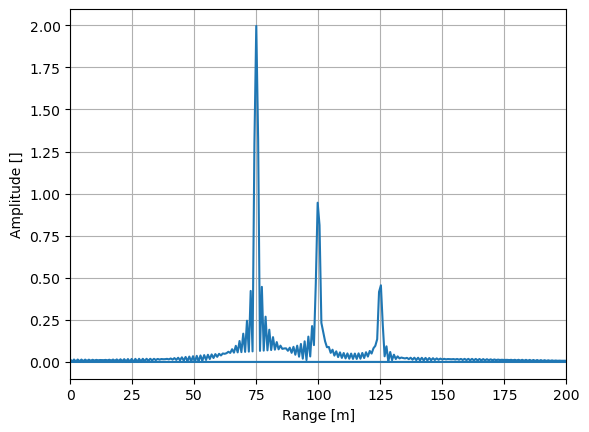

In [25]:
import numpy as np #type:ignore
import matplotlib.pyplot as plt #type:ignore

#Function for linear frequency Modulated signal
def lfm(t,Tp,f0,B):
    lfm=np.where(np.abs(t)<Tp/2,np.cos((2*np.pi*f0*t)+(np.pi*B/Tp*t**2)),0)
    return lfm


f0=1e9   #Carrier frequency[Hz]
BW=100e6 #Bandwidth[Hz]
Tp=20e-6 #Sweep time[s]   
fs=5*f0  #Sampling frequency[Hz] 
c=3e8    #Speed of light 
t=np.arange(-Tp,Tp,1/fs)
range_vector=[75,100,125]
amplitude_vector=[2.0,1.0,0.5]
time_vector=[2*r/c for r in range_vector]

u_tx=lfm(t,Tp,f0,BW)
for i in range(len(amplitude_vector)):
    if i==0:
        u_rx=amplitude_vector[0]*lfm(t-time_vector[0],Tp,f0,BW)
    else:
        u_rx+=amplitude_vector[i]*lfm(t-time_vector[i],Tp,f0,BW)

u_demod=u_tx*u_rx
u_demod_fft = np.fft.fft(u_demod)
f = np.fft.fftfreq(t.size,1/fs)
u_demod_fft_filt=np.where(np.abs(f)<f0,u_demod_fft,0)
u_demod_fft_filt /= (Tp*fs)/4.12
r = c*Tp*f/2/BW
plt.plot(r,np.abs(u_demod_fft_filt))
plt.xlim(0,200)
plt.xlabel("Range [m]")
plt.ylabel("Amplitude []");
plt.grid()
plt.show()